In [106]:
import os
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/identity/pbmc"

In [5]:
adata = sc.read_h5ad(f"/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/pbmc_processed.h5ad")


In [6]:
ood_conds = adata.obs["condition"].unique()

In [10]:
a,b =ood_cond.split("_")

In [12]:
b

'4-1BBL'

In [23]:
df_id = []
for ood_cond in ood_conds:
    if "PBS" in ood_cond:
        continue
    donor, cytokine = ood_cond.split("_")
    res = pd.read_csv(os.path.join(data_dir, f"{cytokine}_{donor}_identity.csv")).set_index("Unnamed: 0").T
    res["donor"] = donor
    res["cytokine"] = cytokine
    df_id.append(res)

In [25]:
df = pd.concat(df_id)

In [109]:
df[df.cytokine=="IFN-beta"]

Unnamed: 0,ood_r_squared,ood_e_distance,ood_mmd,decoded_ood_r_squared,donor,cytokine
IFN-beta,0.589450,5.359480,0.010553,0.884275,Donor10,IFN-beta
IFN-beta,-0.335042,16.131113,0.024250,0.630397,Donor11,IFN-beta
IFN-beta,-0.510804,21.398124,0.025771,0.586840,Donor12,IFN-beta
IFN-beta,0.661350,4.629702,0.007317,0.916437,Donor1,IFN-beta
IFN-beta,-0.422523,16.428092,0.020492,0.663307,Donor2,IFN-beta
IFN-beta,0.885202,1.452249,0.003108,0.966630,Donor3,IFN-beta
IFN-beta,0.654829,8.763031,0.017601,0.828954,Donor4,IFN-beta
IFN-beta,-0.287866,17.448678,0.019935,0.667205,Donor5,IFN-beta
IFN-beta,0.065409,14.609627,0.017465,0.735283,Donor6,IFN-beta
IFN-beta,-0.571734,20.044232,0.023286,0.628182,Donor7,IFN-beta


In [31]:
df_mean = df.groupby("cytokine")["decoded_ood_r_squared"].mean()

In [42]:
df_mean = df_mean.sort_values().to_frame()

In [49]:
df_cf = pd.read_csv("/home/icb/dominik.klein/git_repos/ot_pert_new/notebooks/results_allocation/pbmc/.ipynb_checkpoints/wandb_export_2024-12-15T06_00_34.617-08_00.csv")

In [50]:
df_cf = df_cf[["pca_decoded_ood_r_squared_mean", "dataset.ood_condition"]]

In [51]:
df_cf["cytokine"] = df_cf["dataset.ood_condition"]

In [52]:
df_cf["decoded_ood_r_squared"] = df_cf["pca_decoded_ood_r_squared_mean"]

In [53]:
df_mean

,decoded_ood_r_squared
cytokine,
IFN-beta,0.729093
IL-4,0.748974
IL-32-beta,0.772600
IFN-omega,0.773668
CD40L,0.786041
...,...
IL-17F,0.992356
TRAIL,0.992379
IL-17A,0.992428


In [55]:
df_cf = df_cf.set_index("cytokine")[["decoded_ood_r_squared"]]

In [56]:
df_cf

,decoded_ood_r_squared
cytokine,
IFN-beta,0.753413
IL-32-beta,0.786686
CD40L,0.791394
IFN-omega,0.801166
IL-4,0.804215
...,...
4-1BBL,NaN
LIGHT,NaN
LT-alpha1-beta2,NaN


In [65]:
inter = list(set(df_mean.index).intersection(set(df_cf.index)))

In [87]:
diff = (df_cf.loc[inter] - df_mean.loc[inter])

In [92]:
df_cf["model"] = "cf"
df_mean["model"] = "id"

In [94]:
df_concat = pd.concat((df_cf, df_mean))

In [103]:
import numpy as np
df_concat.head()
df_concat["cytokine"] = df_concat.index
df_concat.index = np.arange(len(df_concat))

<Axes: xlabel='model', ylabel='decoded_ood_r_squared'>

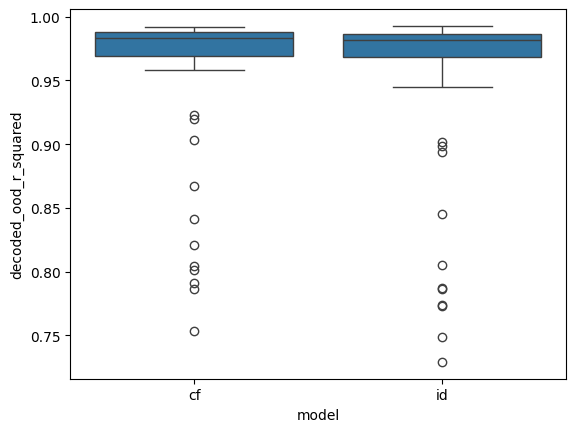

In [105]:
sns.boxplot(df_concat, x="model", y="decoded_ood_r_squared")

In [89]:
diff.loc["IFN-beta"]

decoded_ood_r_squared    0.02432
Name: IFN-beta, dtype: float64

(array([31., 35.,  3.,  5.,  3.,  2.,  2.,  0.,  0.,  1.]),
 array([-0.00489092,  0.00112229,  0.00713551,  0.01314872,  0.01916193,
         0.02517514,  0.03118836,  0.03720157,  0.04321478,  0.049228  ,
         0.05524121]),
 <BarContainer object of 10 artists>)

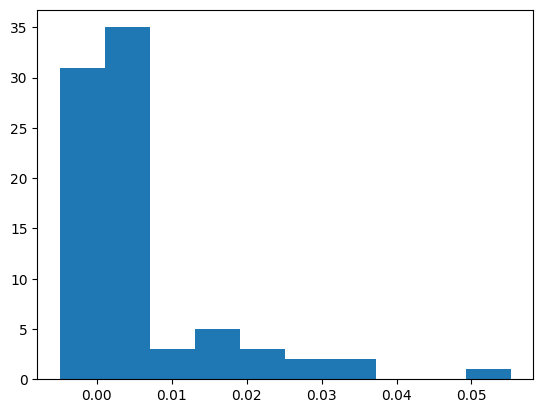

In [91]:
plt.hist(diff)

In [113]:
cyto_strong_effect = df_mean[:10].index

In [114]:
cyto_strong_effect

Index(['IFN-beta', 'IL-4', 'IL-32-beta', 'IFN-omega', 'CD40L', 'IL-15', 'IL-7',
       'IL-2', 'IFN-gamma', 'IL-10'],
      dtype='object', name='cytokine')

In [116]:
adata.obs["condition"]

89_103_005__s1      Donor10_4-1BBL
89_103_083__s1      Donor10_4-1BBL
89_103_085__s1      Donor10_4-1BBL
89_104_009__s1      Donor10_4-1BBL
89_104_025__s1      Donor10_4-1BBL
                         ...      
61_186_093__s144       Donor9_VEGF
61_186_108__s144       Donor9_VEGF
61_186_135__s144       Donor9_VEGF
61_186_157__s144       Donor9_VEGF
61_186_168__s144       Donor9_VEGF
Name: condition, Length: 9697974, dtype: category
Categories (1092, object): ['Donor1_4-1BBL', 'Donor1_ADSF', 'Donor1_APRIL', 'Donor1_BAFF', ..., 'Donor12_TRAIL', 'Donor12_TSLP', 'Donor12_TWEAK', 'Donor12_VEGF']

In [119]:
list(adata[adata.obs["cytokine"].isin(cyto_strong_effect)].obs["condition"].unique())

['Donor10_CD40L',
 'Donor10_IFN-beta',
 'Donor10_IFN-gamma',
 'Donor10_IFN-omega',
 'Donor10_IL-10',
 'Donor10_IL-15',
 'Donor10_IL-2',
 'Donor10_IL-32-beta',
 'Donor10_IL-4',
 'Donor10_IL-7',
 'Donor11_CD40L',
 'Donor11_IFN-beta',
 'Donor11_IFN-gamma',
 'Donor11_IFN-omega',
 'Donor11_IL-10',
 'Donor11_IL-15',
 'Donor11_IL-2',
 'Donor11_IL-32-beta',
 'Donor11_IL-4',
 'Donor11_IL-7',
 'Donor12_CD40L',
 'Donor12_IFN-beta',
 'Donor12_IFN-gamma',
 'Donor12_IFN-omega',
 'Donor12_IL-10',
 'Donor12_IL-15',
 'Donor12_IL-2',
 'Donor12_IL-32-beta',
 'Donor12_IL-4',
 'Donor12_IL-7',
 'Donor1_CD40L',
 'Donor1_IFN-beta',
 'Donor1_IFN-gamma',
 'Donor1_IFN-omega',
 'Donor1_IL-10',
 'Donor1_IL-15',
 'Donor1_IL-2',
 'Donor1_IL-32-beta',
 'Donor1_IL-4',
 'Donor1_IL-7',
 'Donor2_CD40L',
 'Donor2_IFN-beta',
 'Donor2_IFN-gamma',
 'Donor2_IFN-omega',
 'Donor2_IL-10',
 'Donor2_IL-15',
 'Donor2_IL-2',
 'Donor2_IL-32-beta',
 'Donor2_IL-4',
 'Donor2_IL-7',
 'Donor3_CD40L',
 'Donor3_IFN-beta',
 'Donor3_IFN-gamma